In [5]:
import pandas as pd

cardio = pd.read_csv("Data/cardio.csv")
cardio

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [2]:
cardio.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


### Crosstab

It builds a cross-tabulation table that can show the frequency with which certain groups of data appear. 

In [13]:
pd.crosstab(cardio["Product"], [cardio["MaritalStatus"], cardio["Gender"]])

MaritalStatus Partnered      Single     
Gender           Female Male Female Male
Product                                 
TM195                27   21     13   19
TM498                15   21     14   10
TM798                 4   19      3   14

### Pivot Table

Create a spreadsheet-style pivot table as a DataFrame.

In [24]:
pd.pivot_table(cardio, index=["Product", "MaritalStatus"],
                       values=["Education","Income"],
                      columns = ["Gender"], aggfunc=len)

Education      Income     
Gender                   Female Male Female Male
Product MaritalStatus                           
TM195   Partnered            27   21     27   21
        Single               13   19     13   19
TM498   Partnered            15   21     15   21
        Single               14   10     14   10
TM798   Partnered             4   19      4   19
        Single                3   14      3   14

### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000278E3342848>,
      dtype=object)

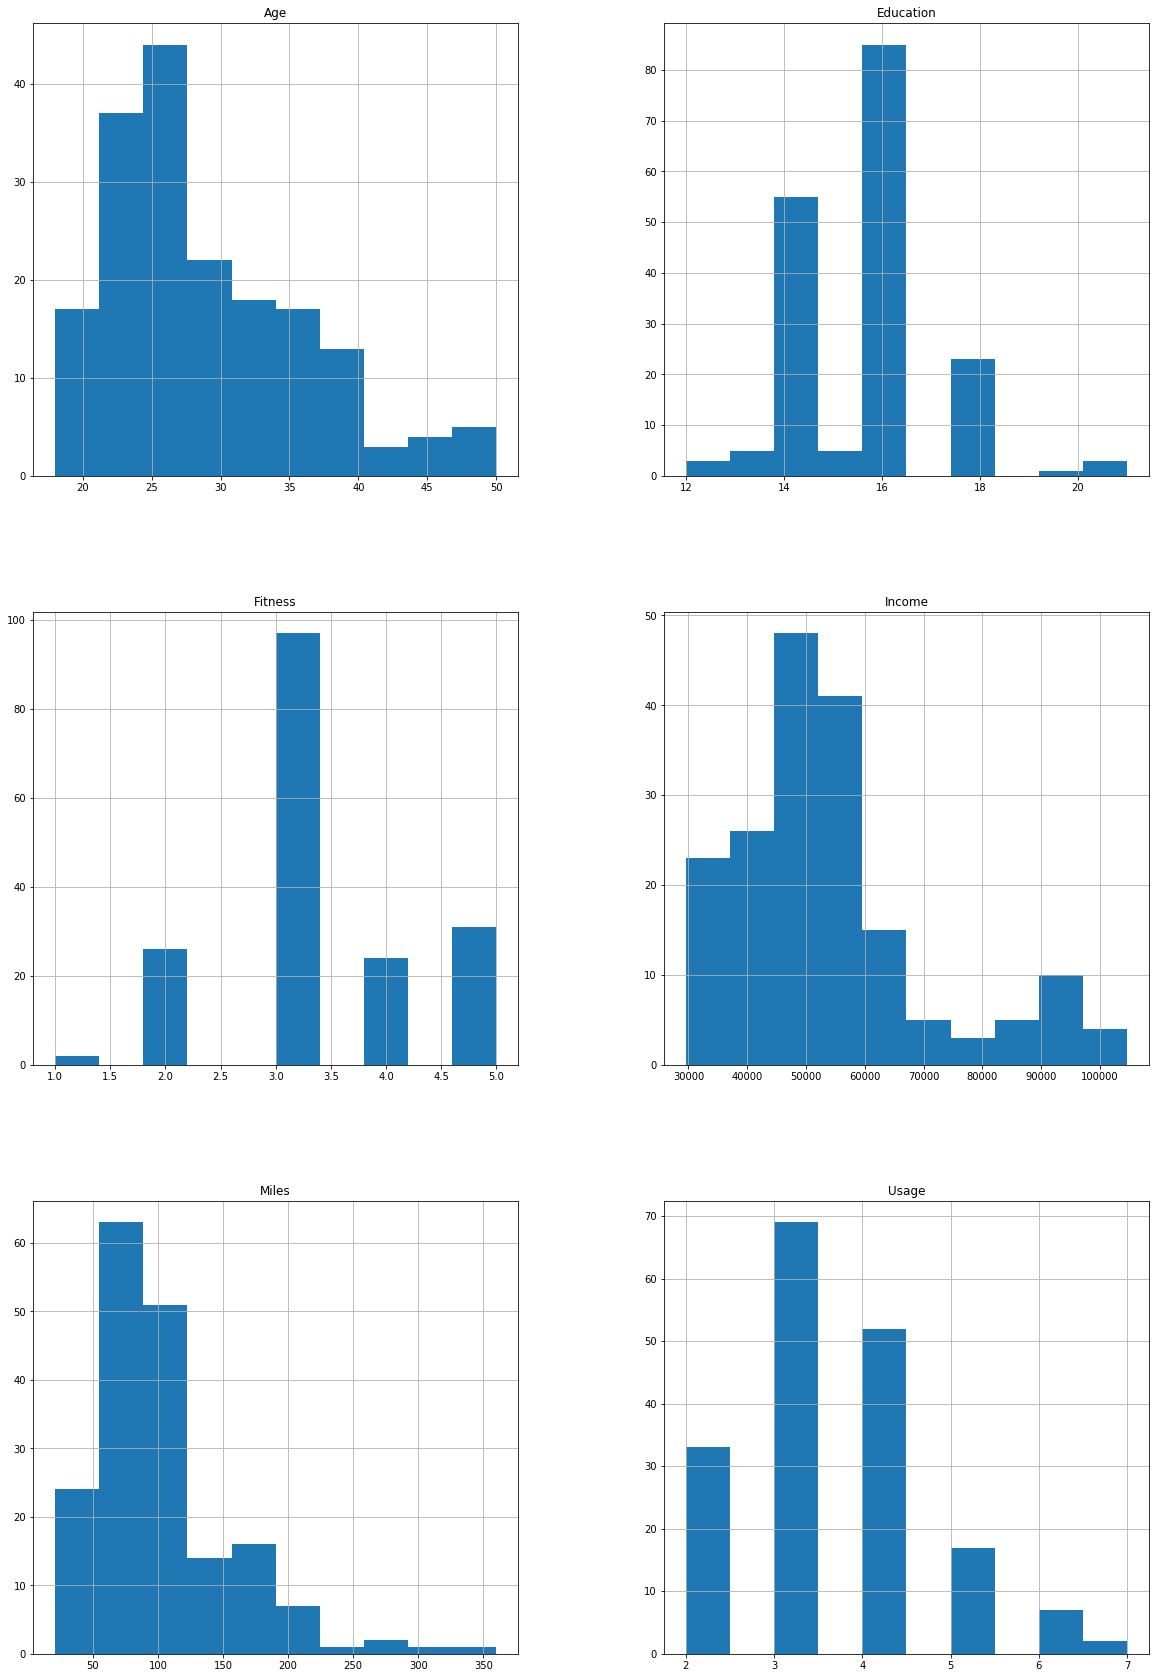

In [27]:
cardio.hist(figsize=(20,30))

### Correlation

Correlation measures the relationship between two variables. The coefficent ranges in value from -1 to 1, with values near these extremes indicating a nearly perfect positive or negative relationship. Values close to 0 typically indicate no or weak relationships.

Pandas `dataframe.corr()` is used to find the pairwise correlation of all columns in the dataframe. For any non-numeric data type columns in the dataframe it is ignored.

In [8]:
corr_cardio = cardio.corr()
corr_cardio

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


* Get a Visual Representation of the Correlation Matrix using Seaborn

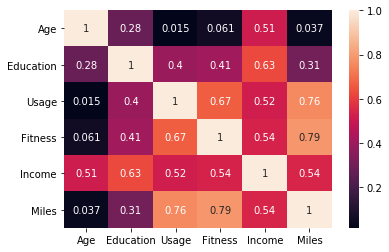

In [9]:
import seaborn as sns

sns.heatmap(corr_cardio, annot=True)

### Covariance

Covariance describes how two variables are related. Covariance indicates the direction of the relationship between two variables.

In [10]:
cov_cardio = cardio.cov()
cov_cardio

,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489
